In [6]:
# This file is aimed to add Xe to the model and see if the model can be improved
from src.DataPrepocessing import *
from src.NeuralNets import *
from src.TrainMethod import *

import matplotlib.pyplot as plt
import torch.optim as optim
import torch.nn as nn
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Data Propocessing

This part will generate a file with following parts
* Keff
* Power
* Threshold
* Histogramed Cs
* Histogramed Xe

In [7]:
core_name = 'cycle_352.csv' 
Gamma_name = "Processed_cycle_32_nonreduced.csv"


output_name = 'Gamma_nonreduced.csv'

shuffle = False

In [8]:
# First, get the keff power and threshold from tracked_results.csv

core_file = pd.read_csv(f"./Gamma Data/{core_name}")
core_file.shape

(353, 13)

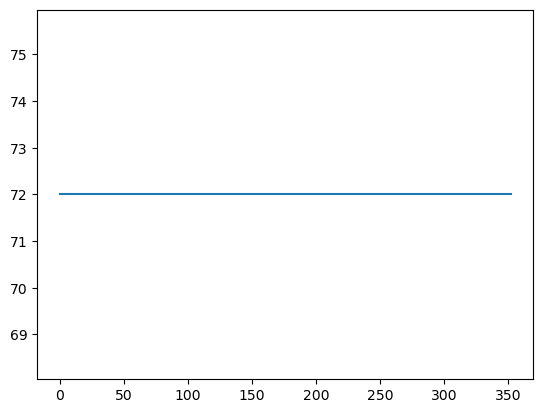

In [9]:
extract_columns = ["keff", "power_normalization_value", "threshold_fuel"]
core_data = core_file[extract_columns].to_numpy()
core_data.shape
import matplotlib.pyplot as plt
plt.plot(core_data[:,2])

In [11]:
Gamma_data = pd.read_csv(f"./Gamma Data/{Gamma_name}").to_numpy()

MemoryError: 

In [ ]:
# do the time align
# although it does not have a clear effect on the result

core_data = core_data[102:]

Gamma_data = Gamma_data[:-1]

In [ ]:

total_data = np.concatenate((core_data, Gamma_data), axis=1)
total_data.shape

(251, 595)

In [ ]:
# check if the first column is the keff

total_data[:,0]

array([1.0090978 , 1.0083896 , 1.00959705, 1.01069736, 1.00999607,
       1.01064544, 1.01183908, 1.01410378, 1.01387664, 1.01354291,
       1.01598343, 1.01601617, 1.01529148, 1.01738471, 1.01726107,
       1.01866081, 1.01883515, 1.01826247, 1.0184861 , 1.01904933,
       1.01955633, 1.01896295, 1.01977305, 1.01827608, 1.01998608,
       1.02086221, 1.01906519, 1.01937784, 1.01883146, 1.01863681,
       1.02036216, 1.01961862, 1.0184333 , 1.01866801, 1.01743509,
       1.01713028, 1.0156789 , 1.01474924, 1.01404446, 1.01292956,
       1.01387516, 1.01299734, 1.01283018, 1.01293717, 1.01094055,
       1.01196693, 1.01135645, 1.01010691, 1.01184741, 1.0106646 ,
       1.01005645, 1.00958495, 1.00932185, 1.00872624, 1.01020498,
       1.00997746, 1.00915425, 1.00974644, 1.01024998, 1.00965676,
       1.01104921, 1.01211323, 1.01249665, 1.01285302, 1.0129773 ,
       1.01342688, 1.0151508 , 1.01535313, 1.01680347, 1.015169  ,
       1.01492441, 1.01638743, 1.01672471, 1.01622057, 1.01820

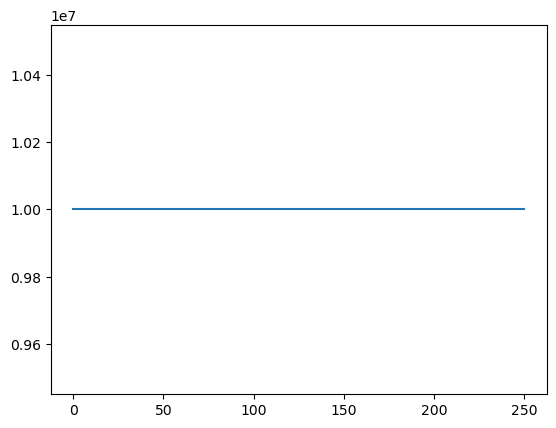

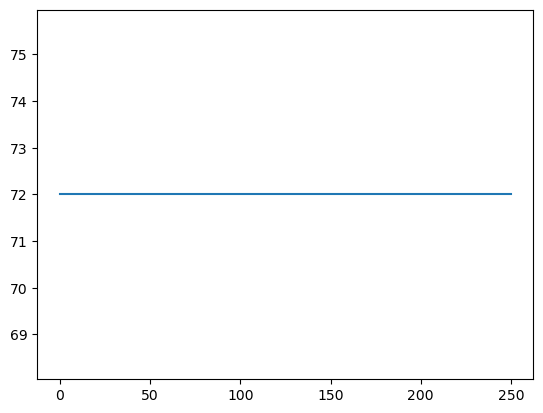

In [ ]:
# check the power and threshold

plt.plot(total_data[:,1])
plt.figure()
plt.plot(total_data[:,2])

In [ ]:
def shuffle_ndarray(arr, chunk_size=10):
    num_chunks = arr.shape[0] // chunk_size  # 计算块的数量

    # 将数组切片为长度为 chunk_size 的块
    chunks = np.split(arr[:num_chunks*chunk_size], num_chunks)

    # 对块的索引进行洗牌（shuffle）
    shuffled_indices = np.arange(num_chunks)
    np.random.shuffle(shuffled_indices)

    # 根据洗牌后的索引重新排序块
    shuffled_chunks = [chunks[i] for i in shuffled_indices]

    # 将洗牌后的块重新合并为一个数组
    shuffled_arr = np.concatenate(shuffled_chunks)

    return shuffled_arr


if shuffle:

    total_data = shuffle_ndarray(total_data, 50)

In [ ]:
# Drop the data 

# Save the array as a CSV file
np.savetxt(f'./Gamma Data/{output_name}', total_data, delimiter=',')
np.savetxt(f'./Processed Data/{output_name}', total_data, delimiter=',')